In [2]:
import pandas as pd
import dask.dataframe as dd


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 12.0.1 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
df = dd.read_csv('./train.csv')

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
dtypes_info = df.dtypes.apply(lambda x: x.name)
print(dtypes_info)

key                   string
fare_amount          float64
pickup_datetime       string
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object


In [6]:
df_1= df[['fare_amount', 'pickup_latitude','dropoff_longitude']].astype('float32')
dtypes_info = df_1.dtypes.apply(lambda x: x.name)
print(dtypes_info)

fare_amount          float32
pickup_latitude      float32
dropoff_longitude    float32
dtype: object


In [7]:
df_1.head()

,fare_amount,pickup_latitude,dropoff_longitude
0,4.5,40.721317,-73.841614
1,16.9,40.711304,-73.979271
2,5.7,40.761269,-73.991241
3,7.7,40.733143,-73.991570
4,5.3,40.768009,-73.956657


In [ ]:
# Save Dask DataFrame to compressed CSV # Save Dask DataFrame to HDF5 format with compression
df_1.to_hdf('max_dask.h5', key='data', format='table', complib='zlib', complevel=6)

# Convert StringDtype columns to object dtype
df['column_name'] = df['column_name'].astype('object')

# Save Dask DataFrame to HDF5 with explicit data types

In [18]:
# Save Dask DataFrame to compressed CSV # Save Dask DataFrame to HDF5 format with compression
df_1.to_hdf('max_dask.h5', key='data', format='table', complib='zlib', complevel=6)

KeyboardInterrupt: 

In [19]:
# Path to your HDF5 file
hdf_file = './dask_dataframe_compressed.h5'

# List all the keys/objects inside the HDF5 file
with pd.HDFStore(hdf_file, 'r') as store:
    keys = store.keys()
    print("Keys in the HDF5 file:")
    for key in keys:
        print(key)

# Read a specific DataFrame from the HDF5 file using its key
desired_key = 'data'  # Replace with the key of the DataFrame you want to read
df = pd.read_hdf(hdf_file, key=desired_key)

Keys in the HDF5 file:
/data


In [20]:
df.describe()

,fare_amount,pickup_latitude,dropoff_longitude
count,5.542386e+07,5.542386e+07,5.542348e+07
mean,1.134503e+01,3.991985e+01,-7.251106e+01
std,2.071083e+01,9.642353e+00,1.278220e+01
min,-3.000000e+02,-3.492264e+03,-3.442025e+03
25%,6.000000e+00,4.073493e+01,-7.399140e+01
50%,8.500000e+00,4.075265e+01,-7.398015e+01
75%,1.250000e+01,4.076713e+01,-7.396368e+01
max,9.396336e+04,3.408790e+03,3.457622e+03


In [25]:
# Seleccionar el 5% de las filas usando slicing
subset = df[::10]  # Seleccionar cada 20 filas (aproximadamente 5%)




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

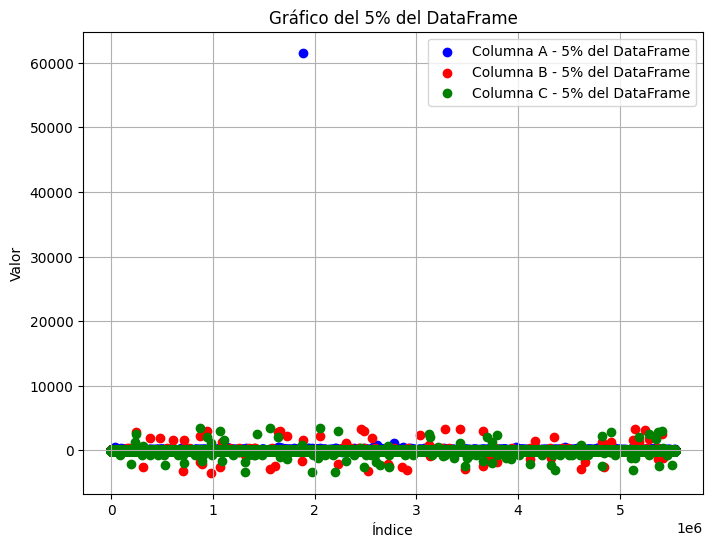

In [27]:
# Gráfico de dispersión de un subconjunto del DataFrame
plt.figure(figsize=(8, 6))
plt.scatter(range(len(subset)), subset['fare_amount'], color='blue', label='Columna A - 5% del DataFrame')
plt.scatter(range(len(subset)), subset['pickup_latitude'], color='red', label='Columna B - 5% del DataFrame')
plt.scatter(range(len(subset)), subset['dropoff_longitude'], color='green', label='Columna C - 5% del DataFrame')
plt.title('Gráfico del 5% del DataFrame')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()